<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Arquitectura Resnet</center></span>

**<center>Resnet</center>**

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
1. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
1. Campo Elías Pardo Turriago, cepardot@unal.edu.co 
1. Oleg Jarma, ojarmam@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Referencias</span>

1. [Documentación de Keras](https://keras.io/getting-started/sequential-model-guide/)
1. [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/pdf/1502.03167.pdf)
1. [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf)
1. [Convolutional Neural Networks at Constrained Time Cost](https://arxiv.org/pdf/1412.1710.pdf)

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Normalización por lotes](#Normalización-por-lotes)
* [Algoritmo de normalización en lote](#Algoritmo-de-normalización-en-lote)
* [Aprendizaje residual profundo](#Aprendizaje-residual-profundo)
* [Resnet y la función de pérdida](#Resnet-y-la-función-de-pérdida)
* [Ejemplo con datos de CIFAR10 ](#Ejemplo-con-datos-de-CIFAR10 )





## <span style="color:blue">Introducción </span>

El problema de las redes profundas (deep neuronal network) es que en la medida que el modelo es mas profundo, el gradiente tiende a desvanecerse (volverse cero) o a estallar (volverse infinito).

Para remediar esta situación se han introducido varias soluciones. En esta lección se introduce las redes residuales. Este ha sido un tipo de red profunda muy exitoso. La idea central es que alguna capas interiores son conectadas con las capas anteriores.

## <span style="color:blue">Normalización por lotes</span>

Con el propósito de acelerar el entrenamiento de las redes y para tratar de evitar el desvanecimiento del gradiente Sergey Ioffe y Christian Szegedy introdujeron en el artículo científico  [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/pdf/1502.03167.pdf) la técnica de normalizar por lotes las activaciones $x$ de cada capa en una red. 

Previamente la función de activación `ReLU` se habia vuelto popular para prevenir el desvanecimiento de gradiente causado en buena parte por la utilización del sigmoide y la tangente hiperbólica como funciones de activación.

De acuerdo con Ioffe y Szegedy, el  hecho de que la distribución de las entradas a cada capa de la red cambia en cada paso del algoritmo dificulta y demora la convergencia. La propuesta que ellos muestran que funciona es hacer una normalización de tipo estadístico a la salida de las capas de cada bloque de datos y luego una transformación afín de los datos normalizados.

La normalización es hecha a los los bloques de entrenamiento que ingresan en cada paso de la actualización del gradiente. Consideremos un mini-lote $\mathcal{B}$ de tamaño $m$. Dado que la normalización se aplica a cada activación de forma independiente, vamos a
centrarnos en una activación particular $x^{(k)}$. Omitimos $k$ por claridad.


Se tienen $m$ valores de esta activación en el mini lote, $\mathcal{B} = \{x_1,\ldots,x_m\}$. Denotemos los correspondientes valores normalizados estadísticamente como  $\hat{x}_1,\ldots,\hat{x}_m$, y las salidas finales de la transformación como  $y_1,\ldots,y_m$.

Los autores definen la transformación BN (`batch normalization`) de la siguiente forma simbólica

$$
BN_{\gamma,\beta}: (x_1, \ldots, x_m) \to (y_1, \ldots, y_m),
$$

en donde $y_i = \gamma \hat{x}_i + \beta \equiv BN_{\gamma,\beta}(x_i)$.  Los valores $\gamma,\beta$ son parámetros que deben ser aprendidos. 

La transformación $BN$ es calculada técnicamente como sigue. En el algoritmo, $\epsilon$ es una constante usada para evitar divisiones por cero.

## <span style="color:blue">Algoritmo de normalización en lote</span>

- **Entrada**: Valores $x$  de un mini-lote: $\mathcal{B} = \{x_1,\ldots,x_m\}$. 
- **Salida** $y_i = BN_{\gamma,\beta}(x_i)$, que se calcula siguiendo el siguiente algoritmo:

$$
\begin{align}
\mu_{\mathcal{B}} &= \frac{1}{m} \sum_{i=1}^{m} x_i\\
\sigma^2_{\mathcal{B}} &= \frac{1}{m} \sum_{i=1}^{m}(x_i- \mu_{\mathcal{B}} )^2\\
\hat{x}_i &= \frac{x_i - \mu_{\mathcal{B}}}{\sqrt{\sigma^2_{\mathcal{B}}+\epsilon}}\\
y_i &= \gamma \hat{x}_i + \beta \equiv BN_{\gamma,\beta}(x_i)
\end{align}
$$

Los parámetros $\gamma,\beta$ deben ser aprendidos.

## <span style="color:blue">Aprendizaje residual profundo </span>

Esta arquitectura de red fue introducida por Kaiming He, Xiangyu Zhang, Shaoqing Ren y Jian Sun en el artículo científico [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf) para el tratamiento de imágenes. La propuesta consiste en:


1. Recibir como entrada el minilote de datos $x_{l-2}$ y mantenerlo almacenado.
1. Pasar $x_{l-2}$ por la capa convolucional, usando *padding= 'same'* para mantener los tamaños originales.
1. Aplicar a la salida de la capa convolucional la normalización por lotes NB, seguida de la activación ReLU. Esta salida se denota $x_{l-1}$
1. Aplicar a  $x_{l-1}$ la capa convolucional seguida de la activación ReLU.
1. Sumar a la salida anterior la entrada original $x_{l-2}$. Si por alguna razón no se usó *padding= 'same'*, es necesario usar una proyección lineal para transformar $x_{l-2}$ al tamaño requerido para poder efectuar la suma.
1. Aplicar a la suma anterior una activación ReLU final para obtener la salida final $x_l$.

La imagen ilustra la diferencia entre la red convolucionada clásica y la red residual. De acuerdo con lo descrito en la sección anterior, asumimos capas de convolución Conv2D con normalización por mini-lotes (BN) y activación ReLU. Esto se denota *Conv2D-BN-ReLU*.


<figure>
<center>
<img src="../Imagenes/Residual_NN_2.png" width="580" height="580" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Comparación de la red convolucionada clasica y la red residual. </p>
</figcaption>
</figure>

Fuente: Alvaro Montenegro

Supongamos que $\mathcal{F}(W_l,x)$ es la salida de la última capa de convolución en la imagen, en donde $x$ denota la entrada y $W_l$ el conjunto de pesos de las convoluciones.

En el gráfico, la entrada a la primera capa convolucionada se denota $x_{l-2}$  con entrada $x_{l-1}$ a la siguiente capa convolucionada. La salida de la segunda capa *Conv2D-BN-ReLU* se denota $x_{l-1}$.

Para la red residual se tiene que la salida de la segunda capa, antes de la activación es $\mathcal{F}(W_l,x)$ . Esta salida se combina con $x_{l-2}$ así:

$$
y_l = \mathcal{F}(W_l,x) + W_s x_{l-2},
$$

en donde $ W_s$ es la proyección (si se requiere). Si $\mathcal{F}(W_l,x)$ y $x_{l-2}$ tienen la misma dimensión, $W_s$ es la matriz identidad.

Finalmente

$$
x_l = ReLU(y_l).
$$

La función  $\mathcal{F}$ se denomina función residual. Es bastante flexible la forma de esta función. En el ejemplo esta conformada por dos capas *Conv2D-BN-ReLU*. Los experimentos muestran que dos o tres capas funcionan bien. Una sola capa es posible, pero en este caso, los resultados no son tan satisfactorios. 

## <span style="color:blue">Resnet y la función de pérdida</span>

Científicos de la Universidad de Meryland han estudiado el efecto de las capas residuales en los modelos resnet.  La siguiente imagen tomada de la [University of Maryland](https://www.cs.umd.edu/~tomg/projects/landscapes/) y producido por los investigadores del tema, ilustra claramente el efecto de las capas residuales en problemas de tratamiento de imágenes. A la izquierda una imagen reducida a tres dimensiones de la función de pérdida en un modelo VGG56 y la derecha para el caso de resnet56. Estas imágenes revelan que la introducción de las capas residuales produce hiper-superficies mas suaves  de la función de pérdida, que obviamente redundan en algortimos de estimación mejor comportados.

<figure>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro_Fundamentos_Programacion/main/Pytorch/Imagenes/perdida_vgg56.png" width=300 height= 400 align="left" />      
</figure>

<figure>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro_Fundamentos_Programacion/main/Pytorch/Imagenes/perdida_Res.png" width=300 height= 400 align="right" />      
</figure>

Visualización funciones de pérdida modelos neuronales VGG56 y resnet56. Fuente: [University of Maryland](https://www.cs.umd.edu/~tomg/projects/landscapes/)

## <span style="color:blue">Ejemplo con datos de CIFAR10 </span>

### Importa módulos

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D, Input
from tensorflow.keras.layers import Flatten, add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import numpy as np
import os

### Datos  CIFAR10

#### Carga los datos y despliega una muestra

In [2]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

(100, 32, 32, 3)
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


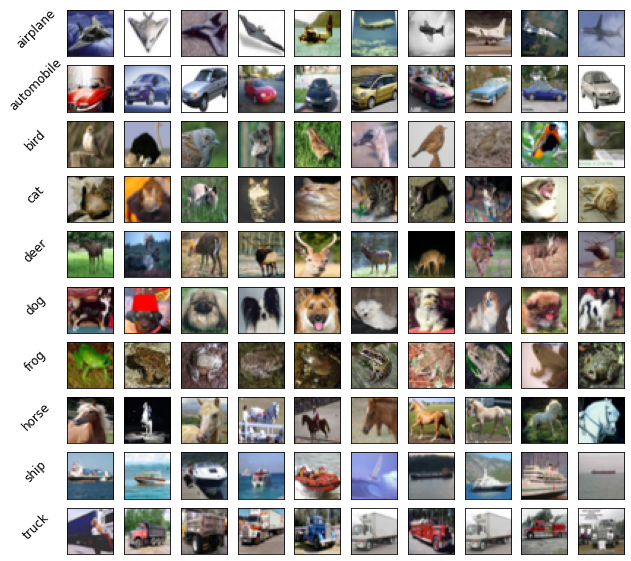

In [3]:
# numpy, math, matplotlib
import numpy as np
import math
import matplotlib.pyplot as plt

class_id = 0
class_count = 0
images = None

for i in range(100):
    while True:
        index = np.random.randint(0, x_train.shape[0], size=1)
        image = x_train[index]
        if y_train[index] == class_id:
            break

    if images is None:
        images = image
    else:
        images = np.concatenate([images, image], axis=0)
    class_count += 1
    if class_count == 10:
        class_id += 1
        class_count = 0
      
print(images.shape)

plt.figure(figsize=(10, 10))
num_images = images.shape[0]
image_size = images.shape[1]
rows = int(math.sqrt(num_images))
row_names = ['{}'.format(row) for row in ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']]
index = 0
for i in range(num_images):
    ax = plt.subplot(rows, rows, i + 1)
    image = images[i, :, :, :]
    image = np.reshape(image, [image_size, image_size, 3])
    plt.imshow(image)
    # plt.axis('off')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(False)
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 
    if (i % rows) == 0:
        ax.set_ylabel(row_names[index], rotation=45, size='large')
        ax.yaxis.labelpad = 20
        print(row_names[index])
        index += 1

# plt.tight_layout()
plt.savefig("cifar10-samples.png")
plt.show()

### Preprocesa los datos

In [4]:
# Resta la media de los  pixels para mejorar la exactitud
subtract_pixel_mean = True
# Número de clase
num_classes = 10

# dimensiones de la imágenes
input_shape = x_train.shape[1:]
# (32, 32, 3)

# normaliza los datos.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# resta la media de los pixels
# centra los datos columna al rededor de cero
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean

# convierte las etiquetas a codificación one-hot
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 10)


### Hiperparámetros de entrenamiento

In [5]:
# tamaño del lote
batch_size = 32 # orig paper trained all networks with batch_size=128
#epochs = 200
# epochs
epochs = 10
# aumentado de datos
data_augmentation = True
# Número de clases de las imágenes
num_classes = 10

### Selecciona un modelo Resnet: Resnet20, ver 1.

Tomado del paper original

In [6]:

# Model parameter
# ----------------------------------------------------------------------------
#           |      | 200-epoch | Orig Paper| 200-epoch | Orig Paper| sec/epoch
# Model     |  n   | ResNet v1 | ResNet v1 | ResNet v2 | ResNet v2 | GTX1080Ti
#           |v1(v2)| %Accuracy | %Accuracy | %Accuracy | %Accuracy | v1 (v2)
# ----------------------------------------------------------------------------
# ResNet20  | 3 (2)| 92.16     | 91.25     | -----     | -----     | 35 (---)
# ResNet32  | 5(NA)| 92.46     | 92.49     | NA        | NA        | 50 ( NA)
# ResNet44  | 7(NA)| 92.50     | 92.83     | NA        | NA        | 70 ( NA)
# ResNet56  | 9 (6)| 92.71     | 93.03     | 93.01     | NA        | 90 (100)
# ResNet110 |18(12)| 92.65     | 93.39+-.16| 93.15     | 93.63     | 165(180)
# ResNet164 |27(18)| -----     | 94.07     | -----     | 94.54     | ---(---)
# ResNet1001| (111)| -----     | 92.39     | -----     | 95.08+-.14| ---(---)
# ---------------------------------------------------------------------------
n = 3

# model version
# orig paper: version = 1 (ResNet v1), 
# improved ResNet: version = 2 (ResNet v2)
version = 1

# computed depth from supplied model parameter n
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)
model_type

'ResNet20v1'

### Programa la actualización de la rata de aprendizaje

In [7]:
def lr_schedule(epoch):
    """Programación de tasas de aprendizaje

    Está previsto que la tasa de aprendizaje se reduzca después de 80, 120, 160, 180 épocas.
    Llamado automáticamente cada época como parte de las devoluciones de llamada durante el entrenamiento.

    # Argumentos
        epoch (int): el número de épocas

    # Returns
        lr (float32): tasa de aprendizaje
    """
    
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

### Definición de un modelo Resnet

#### Define la capa Resnet 

In [8]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """ Constructor de un apilamineto Convolution 2D-Batch Normalization-Activation 

    Argumentos:
        inputs (tensor): tensor de entrada de la imagen de entrada o de la capa anterior
        num_filters (int): número de filtros Conv2D 
        kernel_size (int): dimensiones del kernel cuadrado Conv2D 
        strides (int): tamaño de los strides(saltos) cuadrado Conv2D 
        activation (string): nombre de la activación
        batch_normalization (bool): Cuando incluir batch normalization
        conv_first (bool): ¿Será primero la convolución conv-bn-activation (True) o no?
            bn-activation-conv (False)

    Returns:
        x (tensor): tensor de entrada para la siguiente capa
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x

### Función para crear el modelo ResNet v1

In [11]:
def resnet_v1(input_shape, depth, num_classes=10):
    """ Constructor del modelo ResNet Version 1 

    Apilamientos (stacks) de 2 x (3 x 3) Conv2D-BN-ReLU
    La última ReLU es después de la conexión de acceso directo.
    Al comienzo de cada etapa, el tamaño del mapa de características se reduce a la mitad
    (submuestreo) por una capa convolucional con saltos(strides)= 2, mientras que
    el número de filtros se duplica. Dentro de cada etapa,
    las capas tienen el mismo número de filtros y el
    mismo número de filtros.
    
    Características de los tamaños de los mapas:
    etapa 1: 16x16, 32
    etapa 2:  8x8,  64
    Número aproximado de parámetros
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    Argumentos:
        input_shape (tensor): shape del tensor de la imagen de entrada
        depth (int): número de capas convolucionales 
        num_classes (int): número de clases (CIFAR10 tiene 10)

    Returns:
        model (Model): instancia de Keras model 
        """
    
    if (depth - 2) % 6 != 0:
        raise ValueError('depth debe ser 6n+2 (eg 20, 32)')
    # comenzamos la definción
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # instancia el apilamiento de capas residuales
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            # primera capa layer pero  no primer apilamiento
            if stack > 0 and res_block == 0:  
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            # primera capa layer pero  no primer apilamiento
            if stack > 0 and res_block == 0:
                # Proyección lineal residual para poder sumar
                # arregla los tamaños de x para que coincidan con los de y
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

### Instancia el modelo, lo compila

In [12]:
model = resnet_v1(input_shape=input_shape, depth=depth)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=lr_schedule(0)),
              metrics=['accuracy'])
model.summary()
plot_model(model, to_file="%s.png" % model_type, show_shapes=True)
print(model_type)

Learning rate:  0.001
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_21 (Conv2D)             (None, 32, 32, 16)   448         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_19 (BatchN  (None, 32, 32, 16)  64          ['conv2d_21[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_19 (Activation)     (None, 32, 32, 16)   0           ['bat

### Entrenamiento con datos aumentados

In [14]:
# prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), '../saved_models')
model_name = 'cifar10_%s_model.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]

# run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=callbacks)
else:
    print('Usando aumentado de datos en tiempo real.')
    # this will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False)

    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # fit the model on the batches generated by datagen.flow().
    model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_test, y_test),
                        epochs=epochs, verbose=1, 
                        steps_per_epoch=len(x_train)//batch_size,
                        callbacks=callbacks)




Usando aumentado de datos en tiempo real.
Learning rate:  0.001
Epoch 1/10
1562/1562 [==============================] - ETA: 0s - loss: 0.6859 - accuracy: 0.8294
Epoch 00001: val_accuracy improved from -inf to 0.81730, saving model to /home/bizon/Documents/Diplomado IA y AP/Diplomado-master/Temas/Módulo 7- Aprendizaje Profundo I/7. Redes resnet/Cuadernos/../saved_models/cifar10_ResNet20v1_model.001.h5
1562/1562 [==============================] - 23s 14ms/step - loss: 0.6859 - accuracy: 0.8294 - val_loss: 0.7229 - val_accuracy: 0.8173 - lr: 0.0010
Learning rate:  0.001
Epoch 2/10
1561/1562 [============================>.] - ETA: 0s - loss: 0.6764 - accuracy: 0.8312
Epoch 00002: val_accuracy did not improve from 0.81730
1562/1562 [==============================] - 22s 14ms/step - loss: 0.6762 - accuracy: 0.8313 - val_loss: 0.7661 - val_accuracy: 0.8109 - lr: 0.0010
Learning rate:  0.001
Epoch 3/10
1560/1562 [============================>.] - ETA: 0s - loss: 0.6633 - accuracy: 0.8373
Epoc